In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import pandas as pd

In [3]:
class Config():
    def __init__(self):
        self.ROOT_DATA_DIR = 'FashionMNISTDir'
        self.EPOCH = 10
        self.BATCH_SIZE = 32
        self.LEARNING_RATE = 0.01
        self.IMAGE_SIZE = (28,28)
        self.DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
        print(f'This notebook is using device: {self.DEVICE}')
        self.SEED = 2022

config = Config()

This notebook is using device: cpu


In [4]:
config.SEED

2022

In [5]:
config.ROOT_DATA_DIR

'FashionMNISTDir'

In [11]:
train_data = datasets.FashionMNIST(
                                   root = config.ROOT_DATA_DIR,
                                    train = True,
                                    download = True,
                                    transform = transforms.ToTensor()                                   
)

test_data = datasets.FashionMNIST(
                                   root = config.ROOT_DATA_DIR,
                                    train = False,
                                    download = True,
                                    transform = transforms.ToTensor()                                   
)

26422272it [00:06, 3907002.67it/s]                                                                                                                                                                                   


Extracting FashionMNISTDir\FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



29696it [00:00, 402188.15it/s]                                                                                                                                                                                       


Extracting FashionMNISTDir\FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



4422656it [00:00, 7684956.66it/s]                                                                                                                                                                                    


Extracting FashionMNISTDir\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



6144it [00:00, ?it/s]                                                                                                                                                                                                

Extracting FashionMNISTDir\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



In [12]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: FashionMNISTDir
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: FashionMNISTDir
    Split: Test
    StandardTransform
Transform: ToTensor()

In [14]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [15]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [16]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [18]:
train_data.train_labels

C:\Users\Lenovo\Downloads\Ineuron\deep_learning_project\CNN_Pytorch_implementation_13_MARCH\Pytorch-CNN\env\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [19]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [20]:
given_label_map = train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [23]:
label_map = {v:k for k,v in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

# Visualize one of the samples

In [26]:
train_data.data[1]

tensor([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,  54,
          48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236, 255,
         255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196, 200,
         215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199, 201,
         196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,   0,   0],
        [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250, 245,
         249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,   0,   0],
        [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,  73,
          48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,   0,   0],
        [  0,   0,   0,   0, 200, 222, 209, 20

In [27]:
train_data.data[1].shape

torch.Size([28, 28])

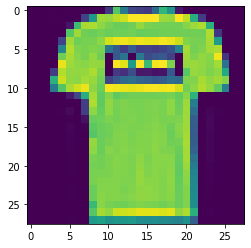

In [28]:
plt.imshow(train_data.data[1])

T-shirt/top


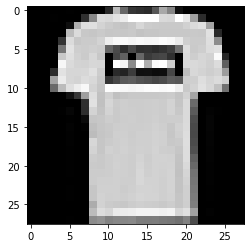

In [38]:
plt.imshow(train_data.data[1],cmap = 'gray')
print(label_map[train_data.targets[1].item()])

In [43]:
train_data.targets[1].item()

0

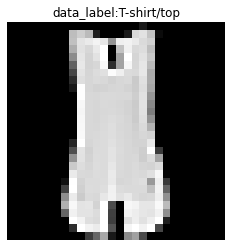

In [44]:
def view_sample_img(data, idx, label_map):
    
    plt.imshow(train_data.data[idx],cmap = 'gray')
    plt.title(f'data_label:{label_map[train_data.targets[idx].item()]}')
    plt.axis('off')

view_sample_img(train_data, 4, label_map)

# Creating DataLoader

In [46]:
train_data_loader = DataLoader(
                                dataset = train_data,
                                batch_size = config.BATCH_SIZE,
                                shuffle = True
)

test_daa_loader = DataLoader(
                                dataset = test_data,
                                batch_size = config.BATCH_SIZE,
                                shuffle = True
)

In [47]:
train_data_loader

In [52]:
type(train_data_loader)

torch.utils.data.dataloader.DataLoader

In [50]:
for images,labels in train_data_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [58]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0196,
          0.0000, 0.0000, 0.0000, 0.2588, 0.9216, 0.8314, 0.8196, 0.8667,
          0.5882, 0.0000, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1647, 0.9569, 0.9098, 0.9451, 0.9647, 0.8980,
          1.0000, 0.3569, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1569,
          0.6627, 0.8000, 0.9020, 0.8706, 0.8745, 0.8627, 0.8863, 0.8863,
          0.8627, 0.9020, 0.8431, 0.6510, 0.3843, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5020, 0.9176,
          0.9216, 0.8863, 0.8549, 0.8275, 0.8941, 0.9451, 0.8510, 0.9059,
          0.8471, 0.8431, 0.8902, 0.9294, 0.9412, 0.7608,

In [59]:
images[0].shape

torch.Size([1, 28, 28])

In [64]:
images[0].permute(1,2,0).shape

torch.Size([28, 28, 1])

In [65]:
images[0].squeeze().shape

torch.Size([28, 28])

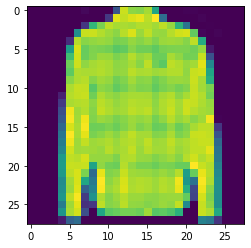

In [66]:
plt.imshow(images[0].squeeze())

In [67]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01960784, 0.        , 0.        ,
        0.        , 0.25882354, 0.92156863, 0.83137256, 0.81960785,
        0.8666667 , 0.5882353 , 0.        , 0.        , 0.        ,
        0.00784314, 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16470589, 0.95686275, 0.9098039 , 0.94509804, 0.9647059 ,
        0.8980392 , 1.        , 0.35686275, 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.15686275, 0.6627451 , 0.8       ,
        0.9019608 , 0.87058824, 0.8745098 , 0.8627451 , 0.8862745 ,
        0.8862745 , 0.8627

In [68]:
images[0].squeeze().numpy().shape

(28, 28)

In [71]:
print(images[0].shape)
print(images[0].squeeze().shape)
print(images[0].unsqueeze(dim = 1).shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 1, 28, 28])


In [72]:
class CNN(nn.Module):
    def __init__(self, in_, out_):
        super(CNN, self).__init__()
        
        pass
    
    def forward(self, x):
        pass

In [94]:
class CNN(nn.Module):
    def __init__(self, in_, out_):
        super(CNN, self).__init__()
        
        self.conv_pool_01 = nn.Sequential(
                                nn.Conv2d(in_channels = in_, out_channels = 8, kernel_size = 5, stride = 1,padding  = 0),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.conv_pool_02 = nn.Sequential(
                                nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 5, stride = 1,padding  = 0),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.Flatten = nn.Flatten()
        self.FC_01 = nn.Linear(in_features = 16*4*4, out_features = 128)
        self.FC_02 = nn.Linear(in_features = 128, out_features = 64)
        self.FC_03 = nn.Linear(in_features = 64, out_features = out_)
        
    
    def forward(self, x):
        x = self.conv_pool_01(x)
        x = self.conv_pool_02(x)
        x = self.Flatten(x)
        x = F.relu(self.FC_01(x))
        x = F.relu(self.FC_02(x))
        x = F.relu(self.FC_03(x))

In [95]:
model = CNN(1, 10)

print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [96]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [97]:
model.parameters()

<generator object Module.parameters at 0x0000023DC52165C8>

In [98]:
next(model.parameters()).is_cuda

False

In [99]:
model.to(config.DEVICE)# this won't work for my system as I dont have GPU

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [100]:
next(model.parameters()).is_cuda # this won't work for my system as I dont have GPU

False

# Count the number of Trainable parameters

In [102]:
model.named_parameters()

<generator object Module.named_parameters at 0x0000023DC4B625C8>

In [114]:
def count_params(model):
    model_params = {'Modules': list(), 'Parameters': list()}
    total = {'trainable':0, 'non_trainable':0}

    for name,parameters in model.named_parameters():
        param = parameters.numel()
        
        if not parameters.requires_grad:
            total['non_trainable'] += param
            continue

        model_params['Modules'].append(name)
        model_params['Parameters'].append(param)
        total['trainable'] += param

    df = pd.DataFrame(model_params)
    df = df.style.set_caption(f'Total parameters: {total}')
    return df

In [115]:
count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


# Training loop